<a href="https://colab.research.google.com/github/geun-hyoung/DataAnalysis_Gangseo-gu/blob/main/Correlation%26regression%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 내부 라이브러리

In [1]:
from google.colab import drive
drive.mount('/content/drive') # Connect to drive

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

Mounted at /content/drive


### 데이터 로드 및 전처리

In [2]:
final_df = pd.read_csv('/content/drive/MyDrive/강서구공모전/fianl_usingdata.csv', encoding = 'cp949')

In [3]:
df_1 = final_df.drop(['area'], axis = 1)    # area는 행정동으로 인덱스 값으로 대체 후 전처리

In [4]:
df_1.head()

,COVID_19,Social_welfare_facilities,pharmacy,hospital,population_density,elderly_person,disorder
0,5417,1,14,6,23924.00000,0.175549,0.025397
1,8569,33,37,12,31860.00000,0.265684,0.070133
2,18515,76,89,6,32520.58824,0.255945,0.041920
3,8238,19,29,20,10151.45161,0.269628,0.078562
4,3916,10,35,1,12325.00000,0.213701,0.041661


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(df_1), 
                        columns = ['COVID_19', 'Social_welfare_facilities', 'pharmacy', 'hospital',
                                   'population_density', 'elderly_person', 'disorder'])

In [8]:
x_scaled

,COVID_19,Social_welfare_facilities,pharmacy,hospital,population_density,elderly_person,disorder
0,0.118277,0.000000,0.127907,0.30,0.710314,0.000000,0.000000
1,0.330461,0.426667,0.395349,0.60,0.977740,0.819311,0.841453
2,1.000000,1.000000,1.000000,0.30,1.000000,0.730780,0.310790
3,0.308179,0.240000,0.302326,1.00,0.246211,0.855163,1.000000
4,0.017233,0.120000,0.372093,0.05,0.319454,0.346791,0.305912
5,0.084349,0.013333,0.000000,0.00,0.966687,0.320642,0.066130
6,0.000000,0.120000,0.093023,0.25,0.000000,0.372527,0.345376
7,0.343386,0.360000,0.325581,0.15,0.190645,1.000000,0.672930


In [9]:
x = x_scaled.drop(['COVID_19'], axis = 1)
y = x_scaled['COVID_19']

### 상관분석

In [10]:
corr = x_scaled.corr(method = 'pearson')
corr

,COVID_19,Social_welfare_facilities,pharmacy,hospital,population_density,elderly_person,disorder
COVID_19,1.000000,0.961389,0.912079,0.221820,0.455279,0.534773,0.200535
Social_welfare_facilities,0.961389,1.000000,0.950222,0.174553,0.363503,0.595987,0.268949
pharmacy,0.912079,0.950222,1.000000,0.144782,0.331017,0.471096,0.196701
hospital,0.221820,0.174553,0.144782,1.000000,-0.075692,0.449155,0.761050
population_density,0.455279,0.363503,0.331017,-0.075692,1.000000,-0.099088,-0.276476
elderly_person,0.534773,0.595987,0.471096,0.449155,-0.099088,1.000000,0.845071
disorder,0.200535,0.268949,0.196701,0.761050,-0.276476,0.845071,1.000000


<Axes: >

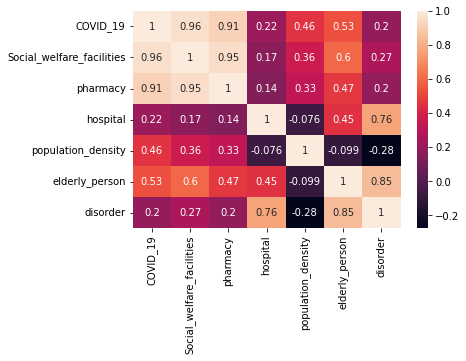

In [11]:
sns.heatmap(corr, annot = True)

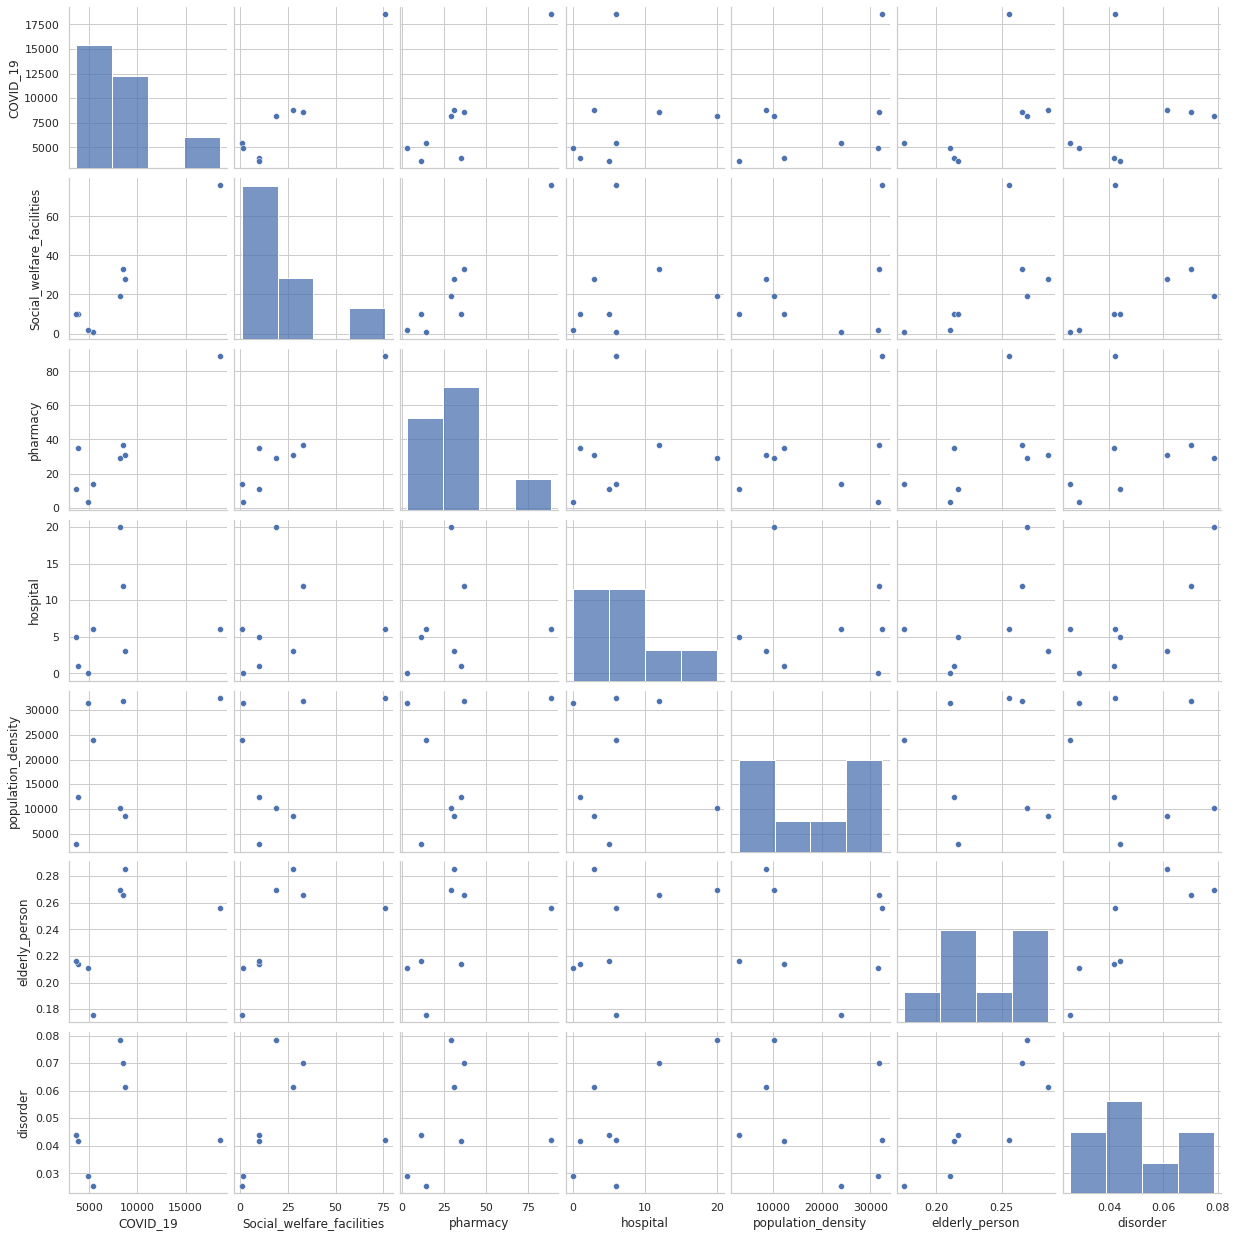

In [12]:
sns.set(style='whitegrid')
sns.pairplot(final_df)
plt.show()

### 다중 선형 회귀분석

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

r_square = lr.score(x_test, y_test)
print('R-square: ', r_square)
print('\n')

print('x 변수의 기울기: ', lr.coef_)
print('\n')

print('절편:', lr.intercept_)
print('\n')

R-square:  -1.6724651278267268


x 변수의 기울기:  [ 0.12428022 -0.54685799  0.56071719 -0.18380031  0.37134977 -0.14011754]


절편: 0.15056448918184537




In [15]:
import pandas as pd
import statsmodels.formula.api as sm
result = sm.ols(formula = 'COVID_19 ~ Social_welfare_facilities +	pharmacy + hospital +	population_density + elderly_person + disorder', data = x_scaled ).fit()

In [17]:
result.summary()

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               COVID_19   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     76.58
Date:                Thu, 23 Mar 2023   Prob (F-statistic):             0.0873
Time:                        07:50:08   Log-Likelihood:                 22.714
No. Observations:                   8   AIC:                            -31.43
Df Residuals:                       1   BIC:                            -30.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.1766      0.056     -3.126      0.197      -0.894       0.541
Social_welfare_facilities     0.2141      0.247      0.866      0.546      -2.926       3.354
pharmacy                      0.3861      0.197      1.960      0.300      -2.116       2.889
hospital                      0.6259      0.119      5.244      0.120      -0.891       2.142
population_density            0.0469      0.046      1.011      0.496      -0.543       0.637
elderly_person                0.9532      0.215      4.435      0.141      -1.778       3.684
disorder                     -1.1252      0.225     -4.995      0.126      -3.988       1.737
==============================================================================
Omnibus:                        1.142   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                0.802
Skew:                           0.550   Prob(JB):                        0.670
Kurtosis:                       1.907   Cond. No.                         42.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print('절편과 기울기')
print(result.params)
print()
print('유의확률: ', result.pvalues)
print()

print('결정계수: ', result.rsquared)
print('예측', result.predict())

절편과 기울기
Intercept                   -0.176621
Social_welfare_facilities    0.214052
pharmacy                     0.386063
hospital                     0.625899
population_density           0.046941
elderly_person               0.953234
disorder                    -1.125235
dtype: float64

유의확률:  Intercept                    0.197089
Social_welfare_facilities    0.545595
pharmacy                     0.300320
hospital                     0.119949
population_density           0.496395
elderly_person               0.141174
disorder                     0.125799
dtype: float64

결정계수:  0.9978283468008353
예측 [0.09387125 0.32293433 1.00509652 0.31885827 0.02535647 0.10284502
 0.00792837 0.32499466]
